In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

When importing dataset, by sorting with MatchID, dataset is now timeseries dataset. Every feature is (home-away) and result is decided with score diff. We have total 50 feature differences.

In [2]:
data=pd.read_csv('Data/Dataset.csv').drop(['Unnamed: 0'],axis=1).sort_values(by=['MatchID'])
df_home=data.filter(regex='home').rename(columns=lambda x:x.replace('_home',''))
df_away=data.filter(regex='away').rename(columns=lambda x:x.replace('_away',''))
df_diff=df_home-df_away
cond=[(df_diff['Score']<0),(df_diff['Score']==0),(df_diff['Score']>0)]
val=['Away','Draw','Home']
df_diff['Result']=np.select(cond,val)
df_diff=df_diff.drop(columns=['Score'])
X=df_diff.iloc[:,:-1]
y=df_diff.iloc[:,-1:].values.ravel()

In [3]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

## Feature selection

Feature ranking:
1. feature Clean sheets (0.041)
2. feature Assists (0.037)
3. feature Big Chances Created (0.032)
4. feature Goals (0.032)
5. feature Passes (0.031)
6. feature Shots on target (0.026)
7. feature Blocked shots (0.025)
8. feature Goals Conceded (0.025)
9. feature Goals with left foot (0.024)
10. feature Tackle success % (0.020)
11. feature Sweeper clearances (0.020)
12. feature Goals with right foot (0.020)
13. feature Big chances missed (0.020)
14. feature Shots (0.019)
15. feature Own goals (0.019)
16. feature Penalties scored (0.019)
17. feature Catches (0.019)
18. feature Last man tackles (0.019)
19. feature Clearances off line (0.019)
20. feature Passes per match (0.019)
21. feature Freekicks scored (0.019)
22. feature Cross accuracy % (0.019)
23. feature Punches (0.018)
24. feature Accurate long balls (0.018)
25. feature Shooting accuracy % (0.018)
26. feature Penalties Saved (0.018)
27. feature Throw outs (0.018)
28. feature Headed goals (0.018)
29. feature Errors

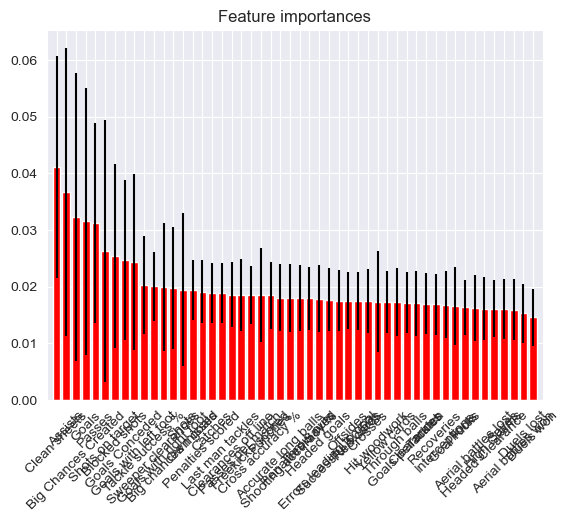

In [4]:
forest=RandomForestClassifier()
forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

In [5]:
X=X.drop(columns=X.columns[indices[15:]])

## Train,Test,Validation set split
Split train,test,validation set into 0.8,0.1,0.1

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((2835, 15), (2835,), (354, 15), (354,), (355, 15), (355,))

## MLP hyperparameter tuning with gridsearch

In [ ]:
parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}

clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
clf.fit(X_train,y_train)
print(clf.best_params_)

/Users/hokuma/miniconda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hokuma/miniconda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hokuma/miniconda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status

In [19]:
clf.score(X_test,y_test)

0.6129943502824858

In [20]:
clf.score(X_val,y_val)

0.5605633802816902